### ５－１　サポートベクターマシンによる線形・非線形分離

#### 5-5-1.py

In [2]:
from sklearn import svm, metrics, preprocessing, model_selection 
from mlxtend.plotting import plot_decision_regions 
from sklearn.svm import LinearSVC
import pandas as pd

df_wine_all=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
#クラス(0,1,2) アルコール度数(2列)　リンゴ酸(3列)を利用
df_wine=df_wine_all[[0,1,2]]
df_wine.columns = [u'class', u'alcohol', u'malic']
pd.DataFrame(df_wine)  #この行を実行するとデータが見れる
  
x=df_wine["alcohol"]
y=df_wine["malic"]
z=df_wine["class"]-1

df_wine


,class,alcohol,malic
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
5,1,14.20,1.76
6,1,14.39,1.87
7,1,14.06,2.15
8,1,14.83,1.64
9,1,13.86,1.35


#### 5-1-2.py

In [8]:
X=df_wine[["alcohol","malic"]]
#正規化 (平均0 標準偏差1)
sc=preprocessing.StandardScaler()
sc.fit(X)
X_std=sc.transform(X)
clf = LinearSVC()
 
    
#モデルを作成する
clf.result1=svm.SVC(C=1.0, kernel='linear') #線形カーネル　ヒンジ関数（誤差関数）を最小化
clf.result2=svm.LinearSVC(C=1.0) #線形カーネル ヒンジ関数（誤差関数）の二乗誤差を最小化
clf.result3=svm.SVC(C=1.0, gamma=0.1, kernel='rbf') #ガウスカーネル
clf.result4=svm.SVC(C=1.0,  kernel='poly',degree=3)#３次元多項式カーネル

#テストデータを４割、残りを教師データに分割し、学習
X_train, X_test, train_label, test_label=model_selection.train_test_split(X_std,z, test_size=0.3)
clf.result1.fit(X_train, train_label)
clf.result2.fit(X_train, train_label)
clf.result3.fit(X_train, train_label)
clf.result4.fit(X_train, train_label)



SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### 5-1-3.py

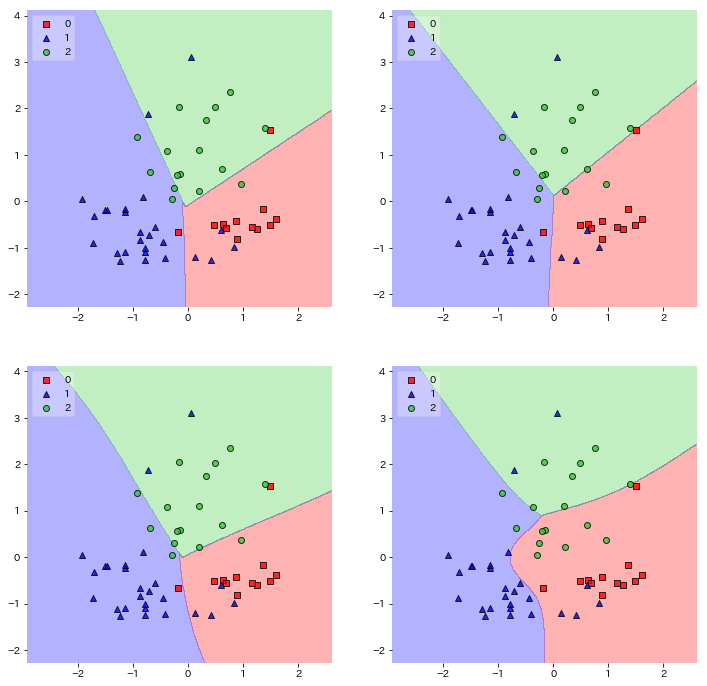

In [9]:
import matplotlib.pyplot as plt 
import numpy as np

#plotする
X_train_plot=np.vstack(X_train)
train_label_plot=np.hstack(train_label)
X_test_plot=np.vstack(X_test)
test_label_plot=np.hstack(test_label)

plt.figure(figsize=(12,12))

plt.subplot(221)
plot_decision_regions(X_test_plot, test_label_plot, clf=clf.result1, res=0.01, legend=2) 
plt.subplot(222)
plot_decision_regions(X_test_plot, test_label_plot, clf=clf.result2, res=0.01, legend=2) 
plt.subplot(223)
plot_decision_regions(X_test_plot, test_label_plot, clf=clf.result3, res=0.01, legend=2) 
plt.subplot(224)
plot_decision_regions(X_test_plot, test_label_plot, clf=clf.result4, res=0.01, legend=2)

plt.show()

### ハンズオン５－２　ランダムフォレストによる説明変数の重要度計算

#### 5-2-1.py

In [1]:
import numpy as np
import pandas as pd

#迷惑メールデータを読み込む
df = pd.read_csv("https://raw.githubusercontent.com/futurebridge/ZukaiML/master/spam.csv")
#データの表示
df


,make,address,all,num3d,our,over,remove,internet,order,mail,...,charSemicolon,charRoundbracket,charSquarebracket,charExclamation,charDollar,charHash,capitalAve,capitalLong,capitalTotal,type
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.778,0.000,0.000,3.756,61,278,spam
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.000,0.372,0.180,0.048,5.114,101,1028,spam
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.000,0.276,0.184,0.010,9.821,485,2259,spam
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.000,0.137,0.000,0.000,3.537,40,191,spam
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.000,0.135,0.000,0.000,3.537,40,191,spam
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.000,0.223,0.000,0.000,0.000,0.000,3.000,15,54,spam
6,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.000,0.054,0.000,0.164,0.054,0.000,1.671,4,112,spam
7,0.00,0.00,0.00,0.0,1.88,0.00,0.00,1.88,0.00,0.00,...,0.000,0.206,0.000,0.000,0.000,0.000,2.450,11,49,spam
8,0.15,0.00,0.46,0.0,0.61,0.00,0.30,0.00,0.92,0.76,...,0.000,0.271,0.000,0.181,0.203,0.022,9.744,445,1257,spam
9,0.06,0.12,0.77,0.0,0.19,0.32,0.38,0.00,0.06,0.00,...,0.040,0.030,0.000,0.244,0.081,0.000,1.729,43,749,spam


#### 5-2-2.py

In [3]:


from sklearn.model_selection import train_test_split

#目的変数について、spamであれば1,nonspamであれば0におきかえる
Y = df['type'].apply(lambda x: 1 if x == 'spam' else 0)
#説明変数について、type以外すべてを指定する
X = df.drop('type', axis=1)
#testデータを３割、トレーニングデータを７割に分割する
(train_x, test_x, train_y,test_y)=train_test_split(X, Y, test_size = 0.4, random_state = 666)




#### 5-2-3.py

In [4]:
#ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
clf = RandomForestClassifier(random_state=0)
clf = clf.fit(train_x, train_y)
pred = clf.predict(test_x)
print ("ランダムフォレストの予測正解率",metrics.accuracy_score(pred, test_y))




ランダムフォレストの予測正解率 0.9440521455730582


#### 5-2-4.py

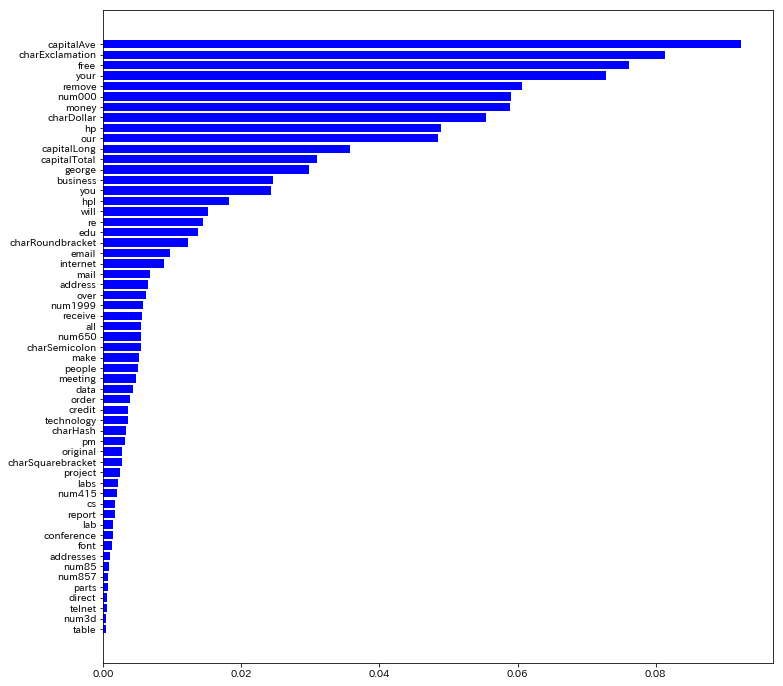

In [5]:
import matplotlib.pyplot as plt
#説明変数の重要度を求める
features = train_x.columns
#重要度を求める
importances = clf.feature_importances_
#重要度をソートする
indices = np.argsort(importances)
#重要度純にプロット
plt.figure(figsize=(12,12))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.show()